# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 0. Clean Up the Zombie Processes
At the end of this notebook, when you execute `env.close()`, it does not clean up the environment completely. Instead, the Unity environment process becomes a "zombie" process. A zombie process is one that has completed execution but still has an entry in the process table because its parent process hasn’t properly reaped it.
You can yourself verify this by running these commands in the terminal. Find the parent process ID (PPID) of the zombie process:
```bash
ps -o pid,ppid,stat,cmd | grep Reacher
```
If the parent process (PPID) is not 1, kill it to clean up the zombie process:
```bash
kill -9 <PPID>
```
Below is the equivalent Python code that checks for and cleans zombie processes using `psutil`. **You need run the cell below only when you restart the Unity environment.** 

> **NOTE**: The code cell below will also kill the Kernel. You should restart it when required.

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [ ]:
!pip -q install .

The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [15]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
# env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

Found path: /data/Reacher_Linux_NoVis/Reacher.x86_64
Mono path[0] = '/data/Reacher_Linux_NoVis/Reacher_Data/Managed'
Mono config path = '/data/Reacher_Linux_NoVis/Reacher_Data/MonoBleedingEdge/etc'
Preloaded 'libgrpc_csharp_ext.x64.so'
Unable to preload the following plugins:
	libgrpc_csharp_ext.x86.so
Logging to /home/student/.config/unity3d/Unity Technologies/Unity Environment/Player.log


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [16]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [17]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [18]:
env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.13199999704957008


When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

# My Implementation

In [6]:
!python3 -m pip install --upgrade pip
!pip install torch

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/b7/3f/945ef7ab14dc4f9d7f40288d2df998d1837ee0888ec3659c813487572faa/pip-25.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.9 MB/s eta 0:00:00a 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 888.1/888.1 MB 28.5 MB/s  0:00:11m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 42.9 MB/s  0:00:07m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 139.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 121.5 MB/s  0:

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.5/155.5 MB 115.9 MB/s  0:00:010:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 81.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 31.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 88.2 MB/s  0:00:00
   ━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  3/21 [triton]  WARNING: The scripts proton and proton-viewer are installed in '/home/student/.local/bin' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
   ━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  4/21 [sympy]  WARNING: The script isympy is installed in '/home/student/.local/bin' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━ 20/21 [torch]-cusolver-cu12]2]2]  WARNING: The scripts torchfrtrace and torchrun are

In [19]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import pandas as pd
from collections import deque
from tqdm import tqdm
from ddpg_agent import Agent
import pickle
import os
from datetime import datetime

In [20]:
def save_checkpoint(agent, scores, episode, best_score, checkpoint_dir='checkpoints'):
    """Save training checkpoint with all necessary information."""
    if not os.path.exists(checkpoint_dir):
        os.makedirs(checkpoint_dir)
    
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    
    checkpoint = {
        'episode': episode,
        'scores': scores,
        'best_score': best_score,
        'actor_state_dict': agent.actor_local.state_dict(),
        'critic_state_dict': agent.critic_local.state_dict(),
        'actor_target_state_dict': agent.actor_target.state_dict(),
        'critic_target_state_dict': agent.critic_target.state_dict(),
        'actor_optimizer_state_dict': agent.actor_optimizer.state_dict(),
        'critic_optimizer_state_dict': agent.critic_optimizer.state_dict(),
    }
    
    # Save main checkpoint
    checkpoint_path = os.path.join(checkpoint_dir, f'checkpoint_ep{episode}_{timestamp}.pth')
    torch.save(checkpoint, checkpoint_path)
    
    # Also save as 'latest' for easy recovery
    latest_path = os.path.join(checkpoint_dir, 'checkpoint_latest.pth')
    torch.save(checkpoint, latest_path)
    
    # If this is the best score, save it separately
    if best_score >= 30.0 or (len(scores) > 0 and np.mean(scores[-100:]) == best_score):
        best_path = os.path.join(checkpoint_dir, f'checkpoint_best_score{best_score:.2f}.pth')
        torch.save(checkpoint, best_path)
    
    return checkpoint_path


In [27]:
def load_checkpoint(agent, checkpoint_path):
    """Load training checkpoint and resume training."""
    # Add weights_only=False to handle PyTorch 2.6+ security
    checkpoint = torch.load(checkpoint_path, weights_only=False)
    
    agent.actor_local.load_state_dict(checkpoint['actor_state_dict'])
    agent.critic_local.load_state_dict(checkpoint['critic_state_dict'])
    agent.actor_target.load_state_dict(checkpoint['actor_target_state_dict'])
    agent.critic_target.load_state_dict(checkpoint['critic_target_state_dict'])
    agent.actor_optimizer.load_state_dict(checkpoint['actor_optimizer_state_dict'])
    agent.critic_optimizer.load_state_dict(checkpoint['critic_optimizer_state_dict'])
    
    return checkpoint['episode'], checkpoint['scores'], checkpoint['best_score']

In [21]:
def load_checkpoint(agent, checkpoint_path):
    """Load training checkpoint and resume training."""
    checkpoint = torch.load(checkpoint_path)
    
    agent.actor_local.load_state_dict(checkpoint['actor_state_dict'])
    agent.critic_local.load_state_dict(checkpoint['critic_state_dict'])
    agent.actor_target.load_state_dict(checkpoint['actor_target_state_dict'])
    agent.critic_target.load_state_dict(checkpoint['critic_target_state_dict'])
    agent.actor_optimizer.load_state_dict(checkpoint['actor_optimizer_state_dict'])
    agent.critic_optimizer.load_state_dict(checkpoint['critic_optimizer_state_dict'])
    
    return checkpoint['episode'], checkpoint['scores'], checkpoint['best_score']

In [22]:
def ddpg_train_with_checkpoints(env, agent, brain_name, n_episodes=300, max_t=1000, 
                                print_every=10, save_every=5, checkpoint_dir='checkpoints',
                                resume_from=None):
    """
    Enhanced DDPG training with checkpoint saving and recovery.
    
    Args:
        save_every: Save checkpoint every N episodes
        resume_from: Path to checkpoint to resume from
    """
    env_info = env.reset(train_mode=True)[brain_name]
    num_agents = len(env_info.agents)
    
    scores_deque = deque(maxlen=100)
    scores_list = []
    best_score = 0.0
    start_episode = 1
    
    # Resume from checkpoint if specified
    if resume_from and os.path.exists(resume_from):
        print(f"📂 Resuming from checkpoint: {resume_from}")
        start_episode, scores_list, best_score = load_checkpoint(agent, resume_from)
        scores_deque.extend(scores_list[-100:])  # Restore the deque
        start_episode += 1  # Start from next episode
        print(f"   Resumed from episode {start_episode-1}, best score: {best_score:.2f}")
    
    # Create progress bar
    remaining_episodes = n_episodes - start_episode + 1
    episode_bar = tqdm(range(start_episode, n_episodes+1), 
                       desc='Training', unit='episode',
                       total=remaining_episodes)
    
    # Track training metrics
    episode_times = []
    buffer_sizes = []
    
    for i_episode in episode_bar:
        start_time = datetime.now()
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        agent.reset()
        scores = np.zeros(num_agents)
        
        for t in range(max_t):
            # Get actions for all agents
            actions = []
            for state in states:
                action = agent.act(state)
                if isinstance(action, np.ndarray):
                    action = action.flatten()
                else:
                    action = np.array(action).flatten()
                actions.append(action)
            
            actions_flat = np.concatenate(actions)
            
            # Step environment
            env_info = env.step(actions_flat)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            
            # Store experiences from all agents
            for i in range(num_agents):
                agent.step(states[i], actions[i], rewards[i], next_states[i], dones[i])
            
            states = next_states
            scores += rewards
            
            if np.any(dones):
                break
        
        # Record metrics
        episode_time = (datetime.now() - start_time).total_seconds()
        episode_times.append(episode_time)
        buffer_sizes.append(len(agent.memory))
        
        # Record scores
        avg_score = np.mean(scores)
        scores_deque.append(avg_score)
        scores_list.append(avg_score)
        
        # Update best score
        current_avg = np.mean(scores_deque)
        if current_avg > best_score:
            best_score = current_avg
        
        # Update progress bar
        episode_bar.set_postfix({
            'Score': f'{avg_score:.2f}',
            'Avg(100)': f'{current_avg:.2f}',
            'Best': f'{best_score:.2f}',
            'Time': f'{episode_time:.1f}s',
            'Buffer': f'{len(agent.memory)/1e6:.2f}M'
        })
        
        # Periodic printing
        if i_episode % print_every == 0:
            avg_time = np.mean(episode_times[-10:]) if len(episode_times) >= 10 else episode_time
            tqdm.write(f'Episode {i_episode} | Avg Score: {current_avg:.2f} | '
                      f'Episode Score: {avg_score:.2f} | Avg Time: {avg_time:.1f}s')
        
        # Save checkpoint
        if i_episode % save_every == 0:
            checkpoint_path = save_checkpoint(agent, scores_list, i_episode, best_score, checkpoint_dir)
            tqdm.write(f'💾 Checkpoint saved: {checkpoint_path}')
        
        # Check if solved
        if current_avg >= 30.0:
            tqdm.write(f'\n🎉 Environment solved in {i_episode-100} episodes! '
                      f'Average Score: {current_avg:.2f}')
            # Save final checkpoint
            save_checkpoint(agent, scores_list, i_episode, best_score, checkpoint_dir)
            # Save standalone model files
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor_solved.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic_solved.pth')
            episode_bar.close()
            break
    
    episode_bar.close()
    
    # Print training summary
    print("\n" + "="*60)
    print("📊 Training Summary:")
    print(f"   Total Episodes: {len(scores_list)}")
    print(f"   Best Average Score: {best_score:.2f}")
    print(f"   Final Average Score: {np.mean(scores_deque):.2f}")
    print(f"   Average Episode Time: {np.mean(episode_times):.1f}s")
    print(f"   Final Buffer Size: {len(agent.memory)/1e6:.2f}M")
    print("="*60)
    
    return scores_list

In [23]:
def find_best_checkpoint(checkpoint_dir='checkpoints'):
    """Find and load the best checkpoint based on score."""
    if not os.path.exists(checkpoint_dir):
        print(f"❌ Checkpoint directory '{checkpoint_dir}' not found")
        return None
    
    best_score = -float('inf')
    best_checkpoint = None
    
    for filename in os.listdir(checkpoint_dir):
        if filename.startswith('checkpoint_') and filename.endswith('.pth'):
            filepath = os.path.join(checkpoint_dir, filename)
            try:
                checkpoint = torch.load(filepath)
                avg_score = np.mean(checkpoint['scores'][-100:]) if len(checkpoint['scores']) >= 100 else np.mean(checkpoint['scores'])
                if avg_score > best_score:
                    best_score = avg_score
                    best_checkpoint = filepath
            except:
                continue
    
    if best_checkpoint:
        print(f"✅ Best checkpoint found: {best_checkpoint}")
        print(f"   Score: {best_score:.2f}")
    
    return best_checkpoint

In [24]:
def analyze_training_progress(checkpoint_dir='checkpoints'):
    """Analyze all checkpoints and show training progress."""
    checkpoints_data = []
    
    for filename in os.listdir(checkpoint_dir):
        if filename.startswith('checkpoint_ep') and filename.endswith('.pth'):
            filepath = os.path.join(checkpoint_dir, filename)
            try:
                checkpoint = torch.load(filepath)
                episode = checkpoint['episode']
                scores = checkpoint['scores']
                avg_score = np.mean(scores[-100:]) if len(scores) >= 100 else np.mean(scores)
                last_score = scores[-1] if scores else 0
                
                checkpoints_data.append({
                    'episode': episode,
                    'avg_score': avg_score,
                    'last_score': last_score,
                    'filename': filename
                })
            except:
                continue
    
    if checkpoints_data:
        df = pd.DataFrame(checkpoints_data).sort_values('episode')
        print("\n📈 Training Progress Analysis:")
        print(df.to_string(index=False))
        
        # Plot progress
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(df['episode'], df['avg_score'], 'b-', label='Avg Score (100 ep)')
        plt.plot(df['episode'], df['last_score'], 'r.', alpha=0.5, label='Episode Score')
        plt.axhline(y=30, color='g', linestyle='--', label='Target')
        plt.xlabel('Episode')
        plt.ylabel('Score')
        plt.title('Checkpoint Progress')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        plt.subplot(1, 2, 2)
        plt.plot(df['episode'], df['avg_score'], 'b-', linewidth=2)
        plt.fill_between(df['episode'], df['avg_score'] - 5, df['avg_score'] + 5, alpha=0.3)
        plt.axhline(y=30, color='g', linestyle='--')
        plt.xlabel('Episode')
        plt.ylabel('Average Score')
        plt.title('Smoothed Progress')
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig('checkpoint_analysis.png', dpi=100, bbox_inches='tight')
        plt.show()
        
        return df
    else:
        print("❌ No checkpoints found for analysis")
        return None

# Run 1

In [ ]:
print("🚀 Enhanced DDPG Training with Checkpointing")
print("=" * 60)

# Initialize environment info
env_info = env.reset(train_mode=True)[brain_name]
num_agents = len(env_info.agents)
state_size = env_info.vector_observations.shape[1]
action_size = brain.vector_action_space_size

print(f"📊 Environment: {num_agents} agents, state_size={state_size}, action_size={action_size}")

# Check for existing checkpoints
if os.path.exists('checkpoints'):
    print("\n📂 Found existing checkpoints directory")
    best_checkpoint = find_best_checkpoint('checkpoints')
    
    if best_checkpoint:
        resume = input("Resume from best checkpoint? (y/n): ").lower() == 'y'
        if resume:
            agent = Agent(state_size=state_size, action_size=action_size, random_seed=42)
            scores = ddpg_train_with_checkpoints(
                env, agent, brain_name, 
                n_episodes=300, 
                max_t=1000,
                print_every=10,
                save_every=5,
                resume_from=best_checkpoint
            )
        else:
            print("Starting fresh training...")
            agent = Agent(state_size=state_size, action_size=action_size, random_seed=42)
            scores = ddpg_train_with_checkpoints(
                env, agent, brain_name, 
                n_episodes=300, 
                max_t=1000,
                print_every=10,
                save_every=5
            )
    else:
        agent = Agent(state_size=state_size, action_size=action_size, random_seed=42)
        scores = ddpg_train_with_checkpoints(
            env, agent, brain_name, 
            n_episodes=300, 
            max_t=1000,
            print_every=10,
            save_every=5
        )
else:
    print("Starting new training with checkpointing...")
    agent = Agent(state_size=state_size, action_size=action_size, random_seed=42)
    scores = ddpg_train_with_checkpoints(
        env, agent, brain_name, 
        n_episodes=300, 
        max_t=1000,
        print_every=10,
        save_every=5  
    )

# Analyze all checkpoints
print("\n📊 Analyzing all checkpoints...")
checkpoint_df = analyze_training_progress('checkpoints')

print("\n✅ Training complete!")

🚀 Enhanced DDPG Training with Checkpointing
📊 Environment: 20 agents, state_size=33, action_size=4
Starting new training with checkpointing...


Training:   2%|▏         | 5/300 [10:09<10:03:30, 122.75s/episode, Score=2.87, Avg(100)=1.40, Best=1.40, Time=125.3s, Buffer=0.10M]

💾 Checkpoint saved: checkpoints/checkpoint_ep5_20250903_231443.pth


Training:   3%|▎         | 10/300 [21:03<10:35:28, 131.48s/episode, Score=6.85, Avg(100)=3.41, Best=3.41, Time=137.0s, Buffer=0.20M]

Episode 10 | Avg Score: 3.41 | Episode Score: 6.85 | Avg Time: 126.3s
💾 Checkpoint saved: checkpoints/checkpoint_ep10_20250903_232537.pth


Training:   5%|▌         | 15/300 [33:17<11:28:44, 145.00s/episode, Score=13.02, Avg(100)=5.73, Best=5.73, Time=149.4s, Buffer=0.30M]

💾 Checkpoint saved: checkpoints/checkpoint_ep15_20250903_233751.pth


Training:   7%|▋         | 20/300 [46:26<12:14:26, 157.38s/episode, Score=17.61, Avg(100)=8.29, Best=8.29, Time=163.9s, Buffer=0.40M]

Episode 20 | Avg Score: 8.29 | Episode Score: 17.61 | Avg Time: 152.3s
💾 Checkpoint saved: checkpoints/checkpoint_ep20_20250903_235100.pth


Training:   8%|▊         | 25/300 [1:01:06<13:24:07, 175.45s/episode, Score=20.13, Avg(100)=10.19, Best=10.19, Time=184.8s, Buffer=0.50M]

💾 Checkpoint saved: checkpoints/checkpoint_ep25_20250904_000541.pth


Training:  10%|█         | 30/300 [1:17:45<14:54:12, 198.71s/episode, Score=20.90, Avg(100)=11.77, Best=11.77, Time=210.1s, Buffer=0.60M]

Episode 30 | Avg Score: 11.77 | Episode Score: 20.90 | Avg Time: 187.9s
💾 Checkpoint saved: checkpoints/checkpoint_ep30_20250904_002220.pth


Training:  12%|█▏        | 35/300 [1:36:52<16:47:07, 228.03s/episode, Score=25.68, Avg(100)=13.47, Best=13.47, Time=245.1s, Buffer=0.70M]

💾 Checkpoint saved: checkpoints/checkpoint_ep35_20250904_004126.pth


Training:  13%|█▎        | 40/300 [1:59:16<19:06:02, 264.47s/episode, Score=30.93, Avg(100)=15.39, Best=15.39, Time=277.6s, Buffer=0.80M]

Episode 40 | Avg Score: 15.39 | Episode Score: 30.93 | Avg Time: 249.0s
💾 Checkpoint saved: checkpoints/checkpoint_ep40_20250904_010350.pth


Training:  15%|█▌        | 45/300 [2:23:41<20:40:27, 291.87s/episode, Score=34.98, Avg(100)=17.37, Best=17.37, Time=303.3s, Buffer=0.90M]

💾 Checkpoint saved: checkpoints/checkpoint_ep45_20250904_012816.pth


Training:  17%|█▋        | 50/300 [2:49:53<21:41:52, 312.45s/episode, Score=34.87, Avg(100)=19.18, Best=19.18, Time=321.5s, Buffer=1.00M]

Episode 50 | Avg Score: 19.18 | Episode Score: 34.87 | Avg Time: 303.7s
💾 Checkpoint saved: checkpoints/checkpoint_ep50_20250904_015427.pth


Training:  18%|█▊        | 55/300 [3:18:04<23:02:53, 338.67s/episode, Score=34.71, Avg(100)=20.62, Best=20.62, Time=353.8s, Buffer=1.00M]

💾 Checkpoint saved: checkpoints/checkpoint_ep55_20250904_022239.pth


Training:  20%|██        | 60/300 [3:46:54<22:51:55, 342.98s/episode, Score=36.88, Avg(100)=21.98, Best=21.98, Time=336.1s, Buffer=1.00M]

Episode 60 | Avg Score: 21.98 | Episode Score: 36.88 | Avg Time: 342.1s
💾 Checkpoint saved: checkpoints/checkpoint_ep60_20250904_025128.pth


Training:  22%|██▏       | 65/300 [4:14:49<22:02:37, 337.69s/episode, Score=35.51, Avg(100)=23.10, Best=23.10, Time=343.7s, Buffer=1.00M]

💾 Checkpoint saved: checkpoints/checkpoint_ep65_20250904_031923.pth


Training:  23%|██▎       | 70/300 [4:43:39<22:02:08, 344.91s/episode, Score=35.79, Avg(100)=24.04, Best=24.04, Time=349.3s, Buffer=1.00M]

Episode 70 | Avg Score: 24.04 | Episode Score: 35.79 | Avg Time: 340.5s
💾 Checkpoint saved: checkpoints/checkpoint_ep70_20250904_034813.pth


Training:  25%|██▌       | 75/300 [5:13:36<22:46:58, 364.53s/episode, Score=36.40, Avg(100)=24.87, Best=24.87, Time=394.3s, Buffer=1.00M]

💾 Checkpoint saved: checkpoints/checkpoint_ep75_20250904_041811.pth


Training:  27%|██▋       | 80/300 [5:45:43<23:20:27, 381.94s/episode, Score=33.76, Avg(100)=25.53, Best=25.53, Time=387.8s, Buffer=1.00M]

Episode 80 | Avg Score: 25.53 | Episode Score: 33.76 | Avg Time: 372.4s
💾 Checkpoint saved: checkpoints/checkpoint_ep80_20250904_045018.pth


Training:  28%|██▊       | 85/300 [6:16:43<21:45:09, 364.23s/episode, Score=35.47, Avg(100)=26.09, Best=26.09, Time=320.7s, Buffer=1.00M]

💾 Checkpoint saved: checkpoints/checkpoint_ep85_20250904_052117.pth


Training:  30%|███       | 90/300 [6:44:04<19:30:57, 334.56s/episode, Score=33.42, Avg(100)=26.55, Best=26.55, Time=327.6s, Buffer=1.00M]

Episode 90 | Avg Score: 26.55 | Episode Score: 33.42 | Avg Time: 350.1s
💾 Checkpoint saved: checkpoints/checkpoint_ep90_20250904_054839.pth


Training:  31%|███       | 93/300 [7:00:49<19:20:27, 336.37s/episode, Score=32.71, Avg(100)=26.79, Best=26.79, Time=347.1s, Buffer=1.00M]

# Run 2

In [28]:
# Load the best checkpoint
best_checkpoint_path = 'checkpoints/checkpoint_best_score26.55.pth'
checkpoint = torch.load(best_checkpoint_path, weights_only=False)

print(f"✅ Best checkpoint loaded!")
print(f"  Episode: {checkpoint['episode']}")
print(f"  Best score: {checkpoint['best_score']:.2f}")
print(f"  Last 5 scores: {checkpoint['scores'][-5:]}")
print(f"  Average of last 100: {np.mean(checkpoint['scores'][-100:]):.2f}")

# Create and load the agent
from ddpg_agent import Agent

agent = Agent(state_size=33, action_size=4, random_seed=42)

# Load all weights
agent.actor_local.load_state_dict(checkpoint['actor_state_dict'])
agent.critic_local.load_state_dict(checkpoint['critic_state_dict'])
agent.actor_target.load_state_dict(checkpoint['actor_target_state_dict'])
agent.critic_target.load_state_dict(checkpoint['critic_target_state_dict'])
agent.actor_optimizer.load_state_dict(checkpoint['actor_optimizer_state_dict'])
agent.critic_optimizer.load_state_dict(checkpoint['critic_optimizer_state_dict'])

print(f"\n✅ Model loaded! Ready to continue training from episode {checkpoint['episode'] + 1}")
print(f"   Only need to improve by {30.0 - checkpoint['best_score']:.2f} points to solve!")

✅ Best checkpoint loaded!
  Episode: 90
  Best score: 26.55
  Last 5 scores: [35.71649920167401, 33.77099924515933, 34.16899923626333, 34.52299922835082, 33.424499252904205]
  Average of last 100: 26.55

✅ Model loaded! Ready to continue training from episode 91
   Only need to improve by 3.45 points to solve!


In [29]:
# Continue training from the best checkpoint
scores = ddpg_train_with_checkpoints(
    env, agent, brain_name,
    n_episodes=300,  
    max_t=1000,
    print_every=5,    
    save_every=5,
    resume_from=best_checkpoint_path
)

📂 Resuming from checkpoint: checkpoints/checkpoint_best_score26.55.pth
   Resumed from episode 90, best score: 26.55


Training:   2%|▏         | 5/210 [10:07<6:58:18, 122.43s/episode, Score=30.32, Avg(100)=26.29, Best=26.55, Time=124.7s, Buffer=0.10M]

Episode 95 | Avg Score: 26.29 | Episode Score: 30.32 | Avg Time: 124.7s
💾 Checkpoint saved: checkpoints/checkpoint_ep95_20250904_110102.pth


Training:   5%|▍         | 10/210 [21:01<7:16:52, 131.06s/episode, Score=33.29, Avg(100)=26.59, Best=26.59, Time=136.1s, Buffer=0.20M]

Episode 100 | Avg Score: 26.59 | Episode Score: 33.29 | Avg Time: 126.1s
💾 Checkpoint saved: checkpoints/checkpoint_ep100_20250904_111155.pth


Training:   7%|▋         | 15/210 [33:09<7:51:20, 145.03s/episode, Score=33.02, Avg(100)=28.15, Best=28.15, Time=151.7s, Buffer=0.30M]

Episode 105 | Avg Score: 28.15 | Episode Score: 33.02 | Avg Time: 138.2s
💾 Checkpoint saved: checkpoints/checkpoint_ep105_20250904_112404.pth


Training:  10%|▉         | 20/210 [46:44<8:33:15, 162.08s/episode, Score=34.20, Avg(100)=29.60, Best=29.60, Time=170.1s, Buffer=0.40M]

Episode 110 | Avg Score: 29.60 | Episode Score: 34.20 | Avg Time: 154.3s
💾 Checkpoint saved: checkpoints/checkpoint_ep110_20250904_113738.pth


Training:  10%|█         | 21/210 [52:36<7:53:25, 150.29s/episode, Score=33.57, Avg(100)=30.11, Best=30.11, Time=178.3s, Buffer=0.44M]


🎉 Environment solved in 12 episodes! Average Score: 30.11

📊 Training Summary:
   Total Episodes: 112
   Best Average Score: 30.11
   Final Average Score: 30.11
   Average Episode Time: 143.4s
   Final Buffer Size: 0.44M


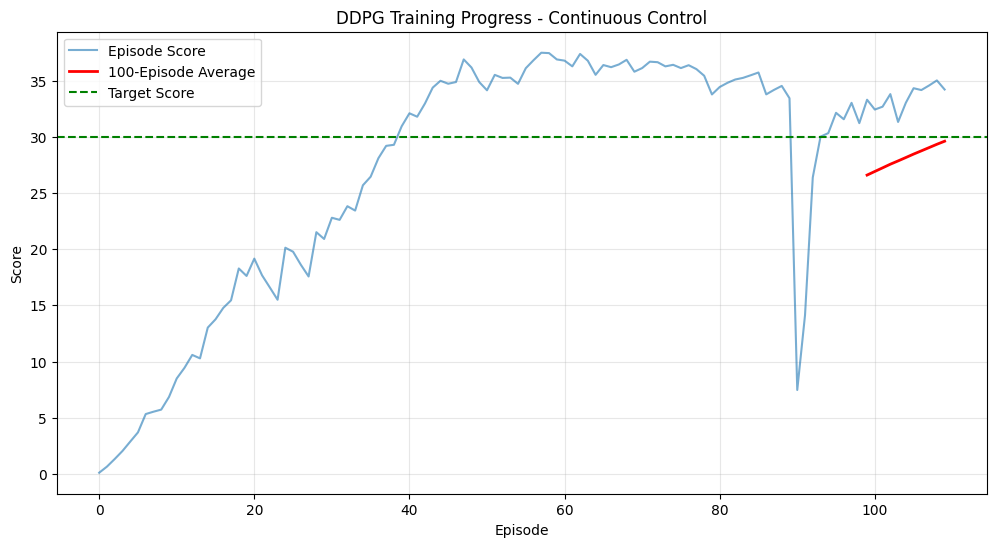

Environment solved in 110 total episodes
Final 100-episode average: 29.60


In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Load your checkpoint to get all scores
checkpoint = torch.load('checkpoints/checkpoint_ep110_20250904_113738.pth', weights_only=False)
all_scores = checkpoint['scores']

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(all_scores, alpha=0.6, label='Episode Score')
rolling_mean = np.convolve(all_scores, np.ones(100)/100, mode='valid')
plt.plot(range(99, len(all_scores)), rolling_mean, color='red', linewidth=2, label='100-Episode Average')
plt.axhline(y=30, color='green', linestyle='--', label='Target Score')
plt.xlabel('Episode')
plt.ylabel('Score')
plt.title('DDPG Training Progress - Continuous Control')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('training_plot.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"Environment solved in {len(all_scores)} total episodes")
print(f"Final 100-episode average: {np.mean(all_scores[-100:]):.2f}")